##Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Importing packages for the further analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading the Breast Cancder Dataset

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/random_survival_forest/data/raw/wpbc.data", header=None)



In [5]:
print(df.keys())

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34],
           dtype='int64')


In [6]:
# Displaying the contents
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [ ]:
# Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       198 non-null    int64  
 1   1       198 non-null    object 
 2   2       198 non-null    int64  
 3   3       198 non-null    float64
 4   4       198 non-null    float64
 5   5       198 non-null    float64
 6   6       198 non-null    float64
 7   7       198 non-null    float64
 8   8       198 non-null    float64
 9   9       198 non-null    float64
 10  10      198 non-null    float64
 11  11      198 non-null    float64
 12  12      198 non-null    float64
 13  13      198 non-null    float64
 14  14      198 non-null    float64
 15  15      198 non-null    float64
 16  16      198 non-null    float64
 17  17      198 non-null    float64
 18  18      198 non-null    float64
 19  19      198 non-null    float64
 20  20      198 non-null    float64
 21  21      198 non-null    float64
 22  22

# Data Preprocessing

In [ ]:
# Adding column names to the dataset
df.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34']
              

In [ ]:
# Finding out the junk values of a column
junk=df.index[df["34"] == '?'].tolist()
print(len(junk))

4


**Observation:**

There are 4 junk values in the column 34.

In [ ]:
# Removing the rows containing the junk values in column 34
df = df[ df['34'] != '?' ]

In [ ]:
# Changing the datatype of the column lymph node status
df['34'] = df['34'].astype(float) 

In [ ]:
# Finding the missing values
df.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

**Observation:**

There are no missing values now in the dataset after the removal of the junk values above

# Exploratory Data Analysis and Visualization

In [ ]:
# Checking summary statistics for the numerical variables
df.describe()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
count,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2.013348e+06,46.938144,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,0.086808,0.192885,0.062743,0.604012,1.273712,4.258835,70.293660,0.006796,0.031328,0.040927,0.015151,0.020609,0.004004,20.990979,30.180258,140.136907,1401.756701,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526,3.211340
std,2.914339e+06,34.523646,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,0.033962,0.027679,0.007289,0.309874,0.527672,2.185778,48.019788,0.002989,0.017743,0.020977,0.005523,0.009634,0.001950,4.245679,6.067777,28.826843,587.040705,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588,5.479276
min,8.423000e+03,1.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,0.193800,0.362100,1.153000,13.990000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,8.561758e+05,14.250000,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,0.063760,0.174075,0.056718,0.388200,0.924550,2.742500,35.365000,0.005016,0.019803,0.026873,0.011422,0.014808,0.002753,17.590000,26.210000,117.925000,940.575000,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000,0.000000
50%,8.864710e+05,39.500000,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,0.086075,0.189350,0.061715,0.540750,1.182000,3.782000,58.455000,0.006209,0.027975,0.036910,0.014280,0.017945,0.003719,20.525000,30.305000,136.500000,1295.000000,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000,1.000000
75%,9.279958e+05,73.000000,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,0.103925,0.209550,0.066810,0.750900,1.468750,5.212750,92.477500,0.007991,0.038532,0.048970,0.017680,0.022880,0.004636,23.730000,33.625000,159.875000,1694.250000,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000,4.000000
max,9.411300e+06,125.000000,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,1.819000,3.503000,13.280000,316.000000,0.031130,0.135400,0.143800,0.039270,0.060410,0.012560,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


**Comment:**

Target:

Column 1 and 2 which are 'outcome' and 'time' respectively are the target variables.

Features:

Column 3-34 are the feature variables and all are numerical in nature.





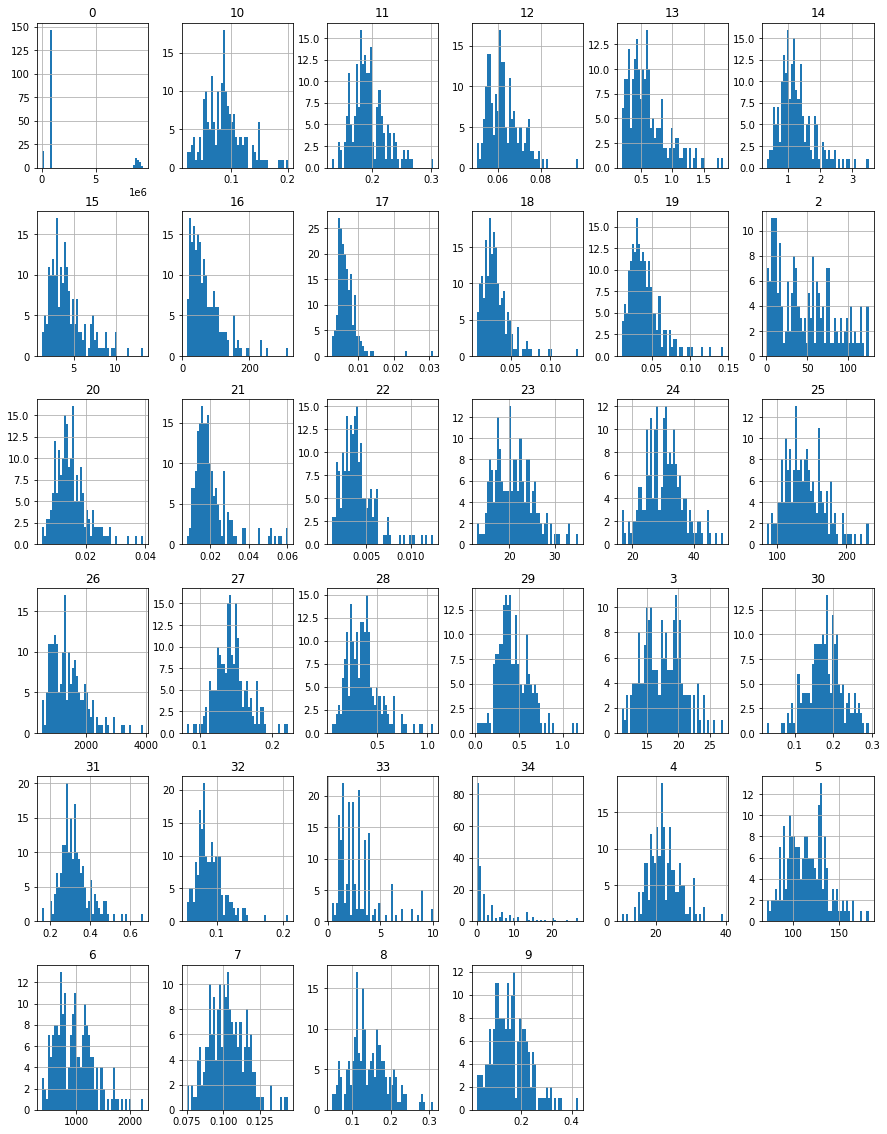

In [ ]:
#Plotting data in histograms for the features
df.hist(bins=50, figsize = (15,20))
plt.show()

**Observations:**

1. Column 0 is not relevant for analysis as it is just the id.
2. The data distribution is not normal and rather skewed except in few cases such as for columns 4,7,11 where they are moderately normal.


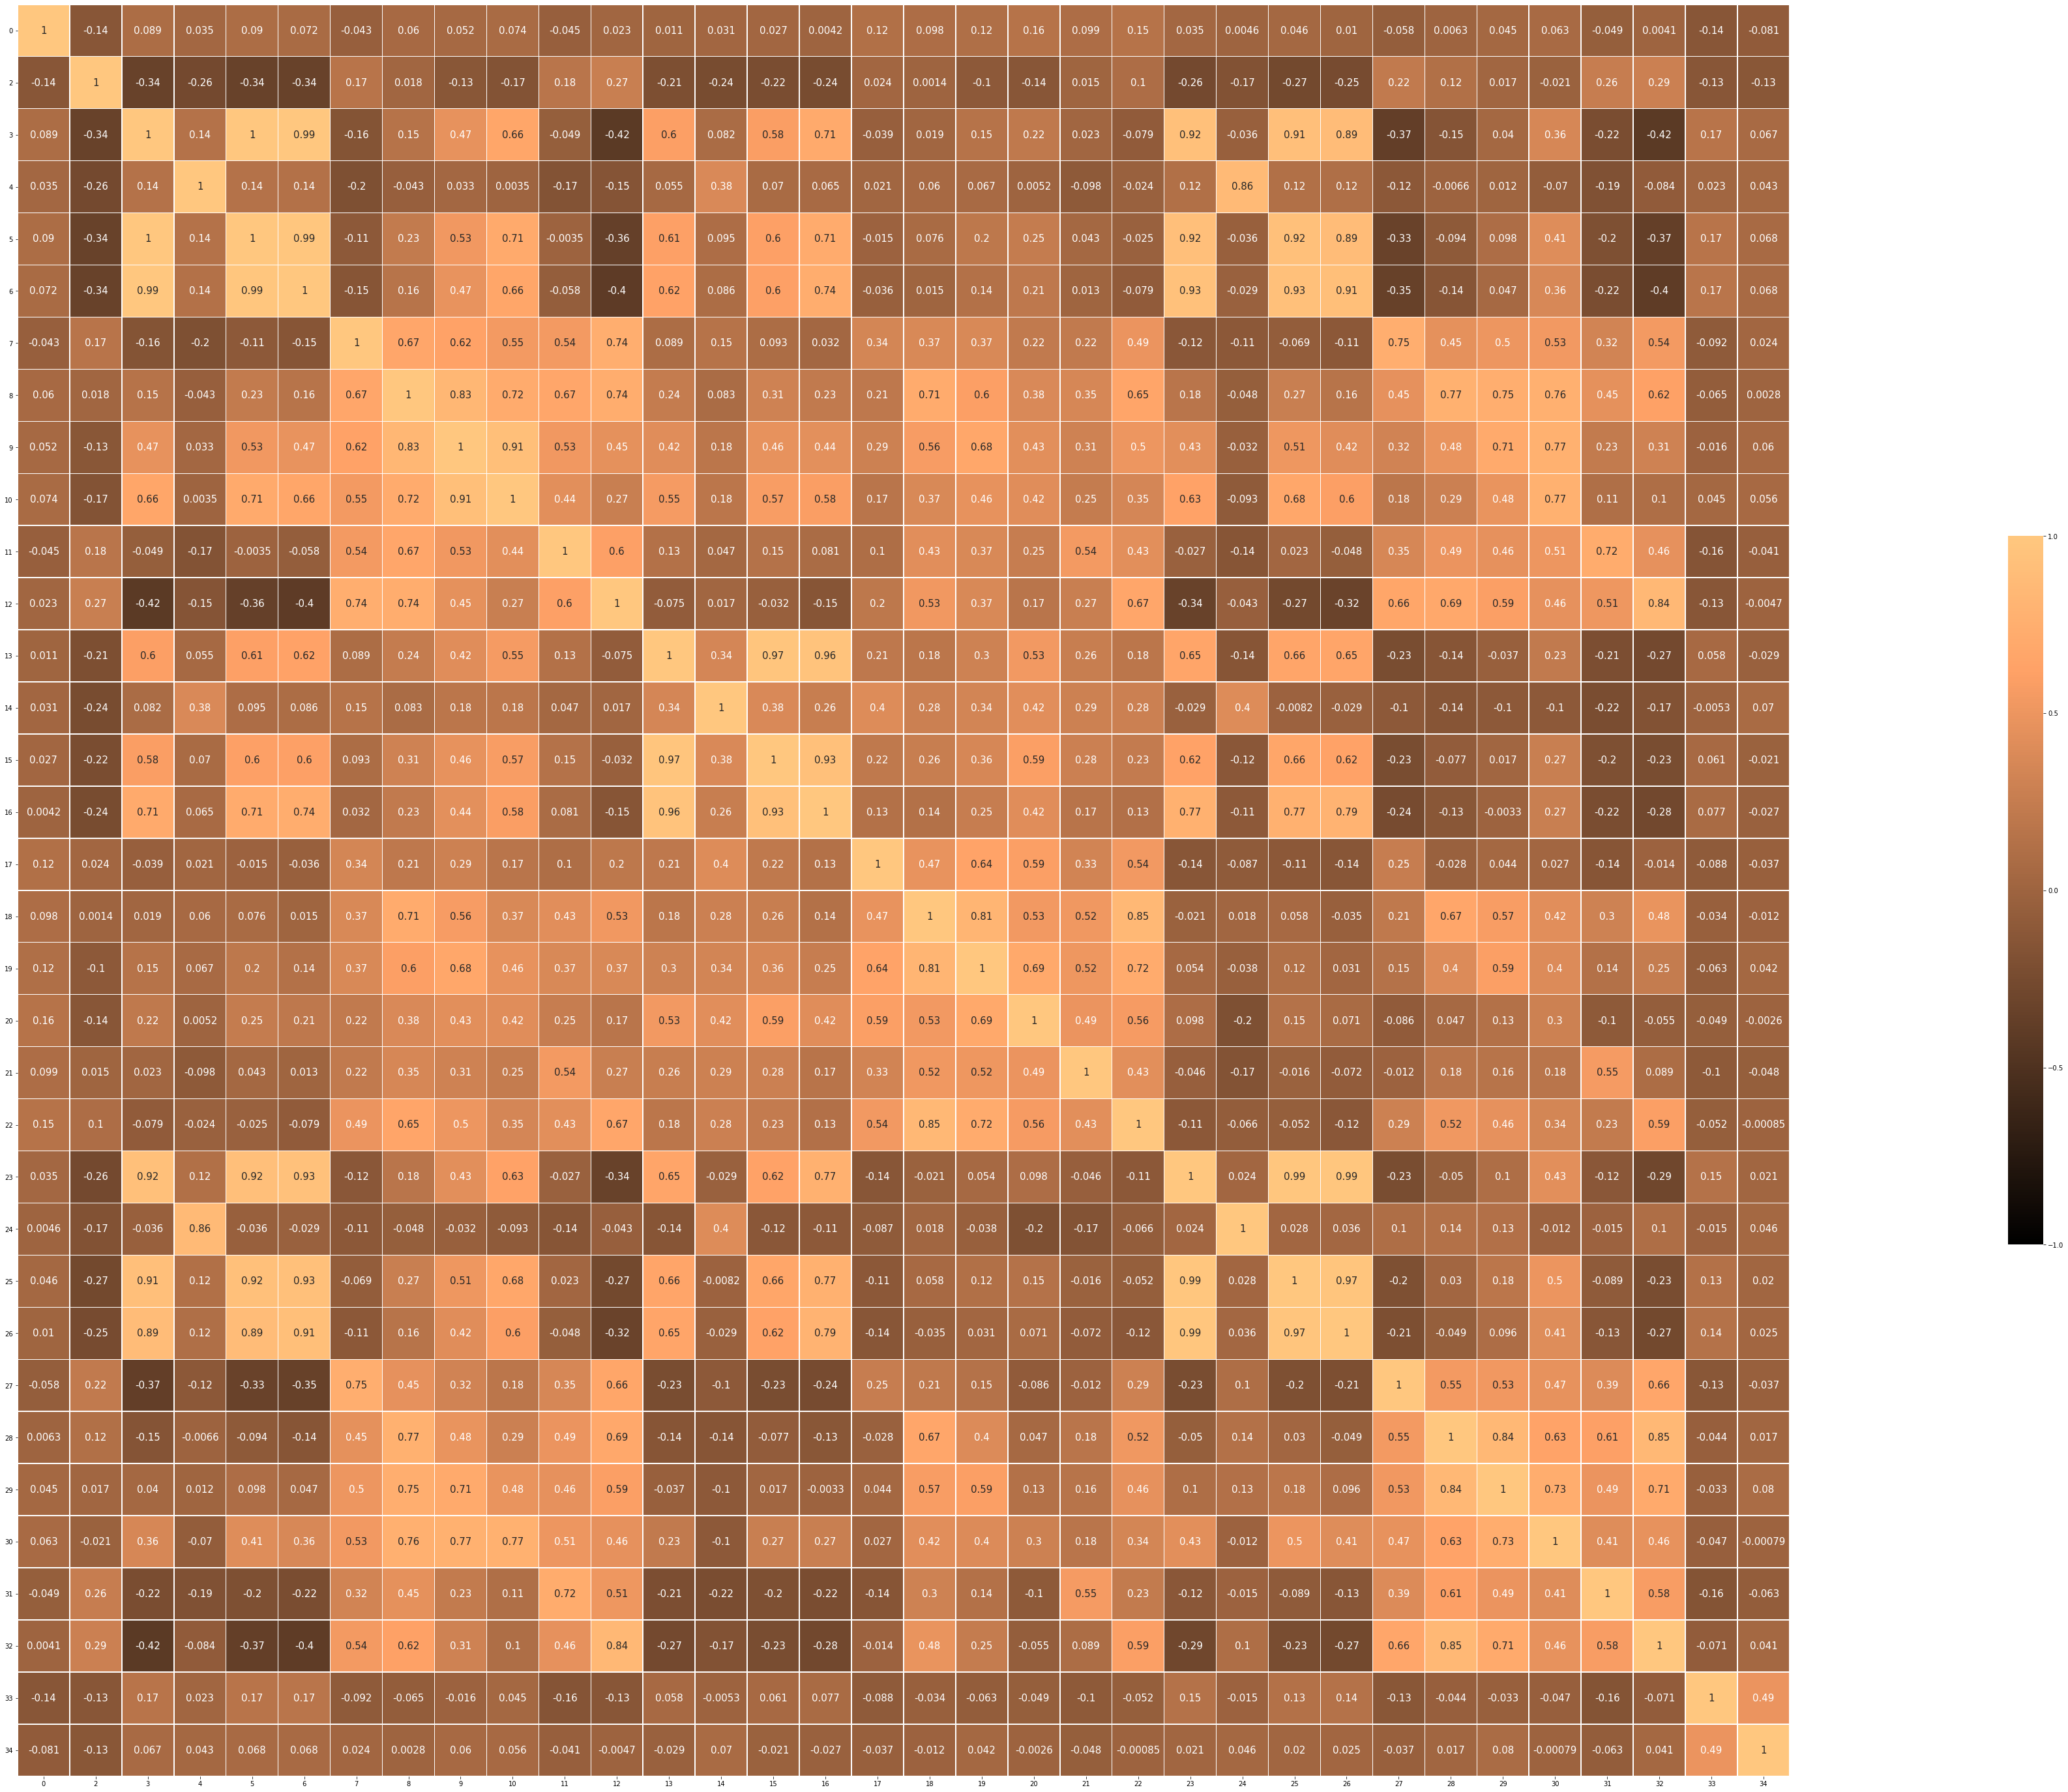

In [ ]:
# Computing th correlation matrix for the features
corr_matrix = df.corr()

f, ax = plt.subplots(figsize=(120,50))

# Generating the heatmap from the correlation matrix
heatmap = sns.heatmap(corr_matrix,
                      
                      square = True,
                      linewidths = .5,
                      cmap = 'copper',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 15})


ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
# Plotting the paiwise scatterplots for all the features
sns.pairplot(df,  hue="1")

Output hidden; open in https://colab.research.google.com to view.

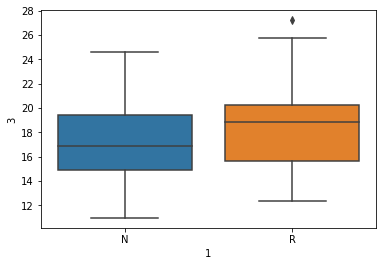

In [ ]:
# Plotting box plot of column 3 for each target class
sns.boxplot(x="1",y="3",data=df)
plt.show()

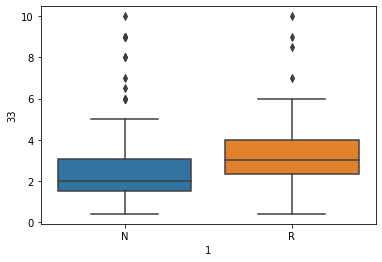

In [ ]:
# Plotting box plot of column 33 for each target class
sns.boxplot(x="1",y="33",data=df)
plt.show()

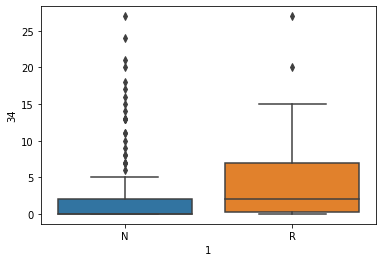

In [ ]:
# Plotting box plot of column 3 for each target class
sns.boxplot(x="1",y="34",data=df)
plt.show()

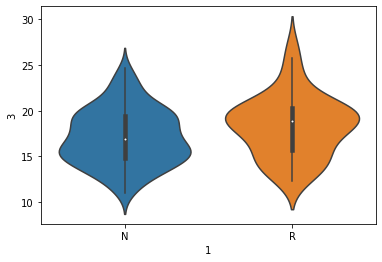

In [ ]:
# Plotting violin plot of column 3 for each target class
sns.violinplot(x="1",y="3",data=df)
plt.show()

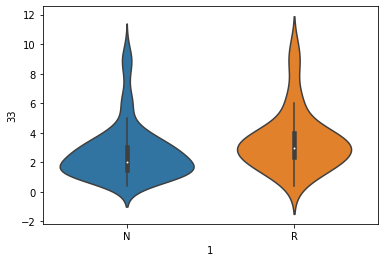

In [ ]:
# Plotting violin plot of column 33 for each target class
sns.violinplot(x="1",y="33",data=df)
plt.show()

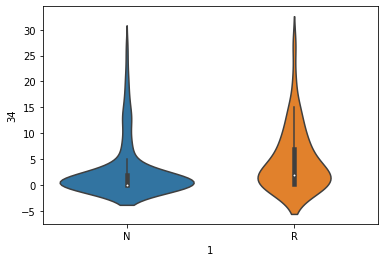

In [ ]:
# Plotting violin plot of column 34 for each target class
sns.violinplot(x="1",y="34",data=df)
plt.show()

In [ ]:
# Renaming columns
df = df.rename(columns={"1": "target1", "2": "target2"})


In [ ]:
# Printing the target distribution in all the records
df.target1.value_counts()

N    148
R     46
Name: target1, dtype: int64

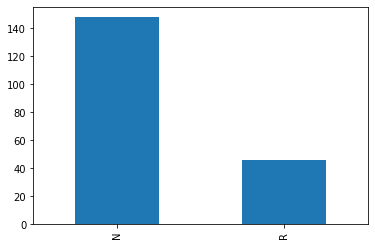

In [ ]:
df['target1'].value_counts().plot(kind='bar')

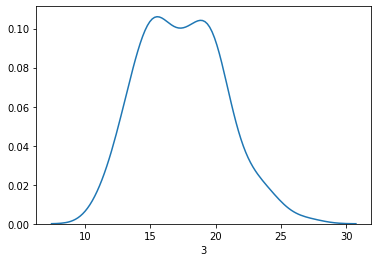

In [ ]:
# Plotting the univariate distribution of a variable of column 3
sns.distplot(df["3"], hist=False);


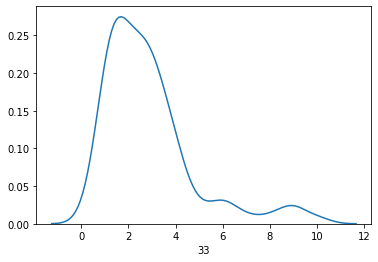

In [ ]:
# Plotting the univariate distribution of a variable of column 33
sns.distplot(df["33"], hist=False);

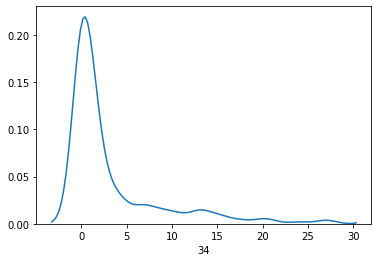

In [ ]:
# Plotting the univariate distribution of a variable of column 34
sns.distplot(df["34"], hist=False);

In [ ]:
# Computing mean for column 3 per target class
mean = df.groupby('target1')['3'].mean().rename("Mean")    

# Computing median for  column 3 per target class
median = df.groupby('target1')['3'].median().rename("Median")    

# Computing standard dev for  column 3 per target class
sd = df.groupby('target1')['3'].std().rename("Standard Deviation")    

# Displaying the mean, median, standard deviation for each target type in the form of a table
pd.concat([mean, median, sd], axis=1)   

,Mean,Median,Standard Deviation
target1,,,
N,17.113716,16.900,3.063699
R,18.330870,18.825,3.365566


In [ ]:
# Computing mean for column 33 per target class
mean = df.groupby('target1')['33'].mean().rename("Mean")    

# Computing median for  column 33 per target class
median = df.groupby('target1')['33'].median().rename("Median")    

# Computing standard dev for  column 3 per target class
sd = df.groupby('target1')['33'].std().rename("Standard Deviation")    

# Displaying the mean, median, standard deviation for each target type in the form of a table
pd.concat([mean, median, sd], axis=1)   

,Mean,Median,Standard Deviation
target1,,,
N,2.679730,2.0,1.893237
R,3.471739,3.0,2.029851


In [ ]:
# Computing mean for column 34 per target class
mean = df.groupby('target1')['34'].mean().rename("Mean")    

# Computing median for  column 34 per target class
median = df.groupby('target1')['34'].median().rename("Median")    

# Computing standard dev for  column 34 per target class
sd = df.groupby('target1')['34'].std().rename("Standard Deviation")    

# Displaying the mean, median, standard deviation for each target type in the form of a table
pd.concat([mean, median, sd], axis=1)   

,Mean,Median,Standard Deviation
target1,,,
N,2.695946,0.0,5.215960
R,4.869565,2.0,6.017045


In [ ]:
# Importing relevant packages
from scipy.stats import skew 
import numpy as np  
import pylab as p  

k = df['target1'].unique().tolist()   # Storing the unique target class values

# Printing the skewness values for all target classes w.r.t. column 3 attribute
for i in k:
  x = df[df.target1 == i]['3']
  print( '\nSkewness for class=' +str(i) +' is ' + str(skew(x)))


Skewness for class=N is 0.27786009448807036

Skewness for class=R is 0.30692578259283665


In [ ]:
# Importing relevant packages
from scipy.stats import skew 
import numpy as np  
import pylab as p  

k = df['target1'].unique().tolist()   # Storing the unique target class values

# Printing the skewness values for all target classes w.r.t. column 33 attribute
for i in k:
  x = df[df.target1 == i]['33']
  print( '\nSkewness for class=' +str(i) +' is ' + str(skew(x)))


Skewness for class=N is 1.8581764875368363

Skewness for class=R is 1.491005961960528


In [ ]:
# Importing relevant packages
from scipy.stats import skew 
import numpy as np  
import pylab as p  

k = df['target1'].unique().tolist()   # Storing the unique target class values

# Printing the skewness values for all target classes w.r.t. column 34 attribute
for i in k:
  x = df[df.target1 == i]['34']
  print( '\nSkewness for class=' +str(i) +' is ' + str(skew(x)))


Skewness for class=N is 2.533716981656485

Skewness for class=R is 1.6623073458765987


**Observations:**

All are positively skewed for the target1 for attributes 3, 33 and 34

target1
N    AxesSubplot(0.125,0.125;0.775x0.755)
R    AxesSubplot(0.125,0.125;0.775x0.755)
Name: 3, dtype: object

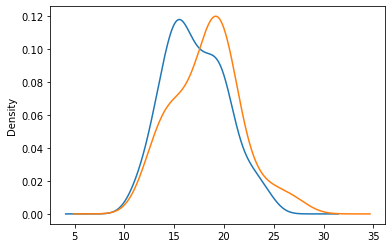

In [ ]:
# Plotting density plots of the column 3 attribute for different target classes
df.groupby('target1')['3'].plot.kde()

target1
N    AxesSubplot(0.125,0.125;0.775x0.755)
R    AxesSubplot(0.125,0.125;0.775x0.755)
Name: 33, dtype: object

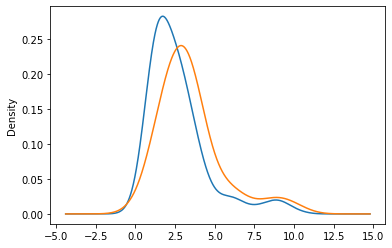

In [ ]:
# Plotting density plots of the column 33 attribute for different target classes
df.groupby('target1')['33'].plot.kde()

target1
N    AxesSubplot(0.125,0.125;0.775x0.755)
R    AxesSubplot(0.125,0.125;0.775x0.755)
Name: 34, dtype: object

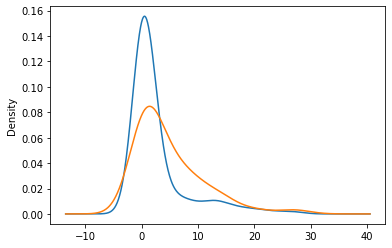

In [ ]:
# Plotting density plots of the column 34 attribute for different target classes
df.groupby('target1')['34'].plot.kde()

In [ ]:
def determine_outliers(data):
  """ Finds out outliers in data

  This function calcuates the outliers present in the data by computing
  the inter-quartile range and determining points lying outside 1.5 times 
  the inter-quartile range

  Arg:
      The input feature of the dataset
  
  Return:
      Returns the outlier list

  """
  outliers=[]   # Initialize list of outliers
  s1 = sorted(data)     # Sorting the feature column
  q1, q3= np.percentile(data,[25,75])    # Computing the lower and upeer quartiles
  iqr = q3 - q1   # Computing the Inter-quartile range
  lower_ext = q1 -(1.5 * iqr)   # Computing the lower extreme
  upper_ext = q3 +(1.5 * iqr)   # Computing the upper extreme
  
  # Check each element of the data whether it falls beyond the lower and upper extremes
  for i in data:
    if i < lower_ext:
      outliers.append(i)
    elif i > upper_ext:
      outliers.append(i)

  return outliers

In [ ]:
# Calling the outlier determining function

for i in range(3,35):
  print("The outliers for the column "+ str(i) + " are as follows")
  print(determine_outliers(df[str(i)]))
  print("\n")


The outliers for the column 3 are as follows
[27.22]


The outliers for the column 4 are as follows
[10.38, 39.28, 33.56, 33.87]


The outliers for the column 5 are as follows
[182.1]


The outliers for the column 6 are as follows
[2250.0, 2010.0, 1945.0]


The outliers for the column 7 are as follows
[0.1425, 0.1398, 0.1447]


The outliers for the column 8 are as follows
[0.2776, 0.2839, 0.2867, 0.2832, 0.3114]


The outliers for the column 9 are as follows
[0.4268, 0.3523, 0.3579]


The outliers for the column 10 are as follows
[0.2012, 0.1878, 0.1913, 0.1842]


The outliers for the column 11 are as follows
[0.304, 0.2655, 0.2678]


The outliers for the column 12 are as follows
[0.09744, 0.08242999999999999]


The outliers for the column 13 are as follows
[1.5090000000000001, 1.296, 1.37, 1.73, 1.347, 1.819, 1.463, 1.374]


The outliers for the column 14 are as follows
[2.91, 3.12, 2.454, 2.8360000000000003, 2.463, 3.503, 2.595, 2.708, 2.403, 2.312]


The outliers for the column 15 a

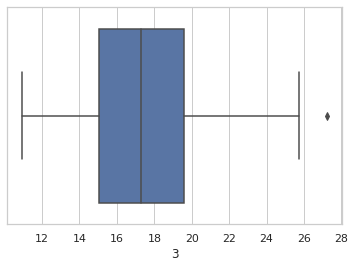

In [ ]:
# Plotting the box plot for column 3
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["3"])

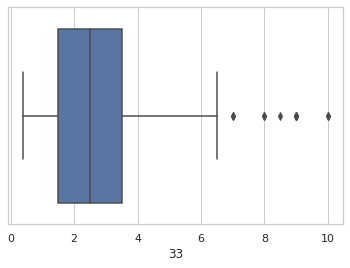

In [ ]:
# Plotting the box plot for column 33
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["33"])

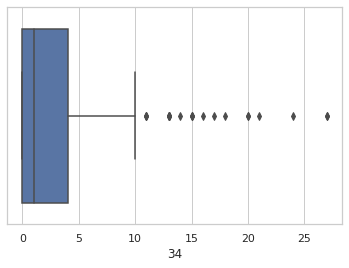

In [ ]:
# Plotting the box plot for column 34
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['34'])

In [ ]:
# Dropping the first column
df.drop(['0'], axis=1)

,target1,target2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,N,3,14.72,25.26,99.28,657.5,0.11740,0.21120,0.17290,0.09465,0.2079,0.07496,0.3405,1.1580,2.188,26.12,0.004957,0.04553,0.05166,0.015970,0.02539,0.005548,16.67,31.97,111.60,814.8,0.14640,0.5352,0.5655,0.19740,0.3778,0.11320,1.7,21.0
193,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0


In [ ]:
# Organizing the dataset into predictors and response variables
Y = df['target1']
Y2 = df['target2']
X = df.loc[:, df.columns != 'target1']
X.shape

(194, 34)

In [ ]:
X = df.loc[:, df.columns != 'target2']


In [ ]:
Y = Y.replace({"N": 0, "R" : 1})

In [ ]:
from sklearn.model_selection import train_test_split

# Randomly splitting the data into training and testing with a ratio of 4:1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 20)